In [31]:
# Part Three: Model exploration
# This notebook is used for instructing the remaining to-do-list
# This notebook is the last version of MinModel
# This notebook will not continue to update
# If you want to add your contributions into github, you can upload (or refresh) your notebook or code into the 'Updating' folder
# You can see the latest version of the updated code in the 'Updated' folder
import pandas as pd
import lightgbm as lgb
import numpy as np
import pickle
import time
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from xgboost import plot_importance

import sys
import gc

In [32]:
def save_pkl(file_dir, data):
    f = open(file_dir,"wb")
    pickle.dump(data, f, protocol=4)
    f.close()
    
def read_pkl(file_dir):
    f = open(file_dir,"rb")
    data = pickle.load(f)
    return data

In [10]:
# lightgbm model parameters
model_param = {'lr': 0.005, 'depth': 10, 'tree': 1000, 'leaf': 400, 'sample': 0.9, 'seed': 3}
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression_l2',
    'metric': {'l2', 'l1'},
    'max_depth': model_param['depth'],
    'num_leaves': model_param['leaf'],
    'min_data_in_leaf': 20,
    'learning_rate': model_param['lr'],
    'feature_fraction': 1,
    'bagging_fraction': model_param['sample'],
    'bagging_freq': 1,
    'bagging_seed': model_param['seed'],
    'verbose': 0
}

# calculate the symmetric mean absolute percentage error (SMAPE)
def get_score(pred, valid_y_exp):
    return np.mean(np.abs(pred - valid_y_exp) / (pred + valid_y_exp) * 2)

# train and test the input X Y with the lightgbm model
def train_test(model_param, params, train_X, test_X, train_Y, test_Y, save_dir):
    time_start = time.time()
    lgb_train = lgb.Dataset(train_X, train_Y)
    lgb_eval = lgb.Dataset(test_X, test_Y, reference=lgb_train)
    gbm = lgb.train(params,
                    lgb_train,
                    num_boost_round=model_param['tree'],
                    valid_sets=lgb_eval,
                    early_stopping_rounds=20)

    test_predict = gbm.predict(test_X)
    score = get_score(test_predict, test_Y)
    save_pkl(save_dir, gbm)
    print('running time: ', time.time() - time_start)
    return score

In [29]:
Y_PM25 = read_pkl("Y_PM25_new.pkl")
Y_PM10 = read_pkl("Y_PM10_new.pkl")
Y_NO2 = read_pkl("Y_NO2_new.pkl")
X = pd.read_pickle('X_new.pkl')


In [5]:
# split the Y_PM25, X into training part and testing part
train_X_PM25, test_X_PM25, train_Y_PM25, test_Y_PM25 = train_test_split(X, Y_PM25, test_size=0.2, random_state=11)
print(train_X_PM25.shape, test_X_PM25.shape, train_Y_PM25.shape, test_Y_PM25.shape)

(8713958, 61) (2178490, 61) (8713958,) (2178490,)


In [7]:
# train and test the lightgbm model with X and Y_PM25 data
# save the model parameters into lightgbm_PM25.model
score = train_test(model_param, params, train_X_PM25, test_X_PM25, train_Y_PM25, test_Y_PM25, "London/lightgbm_PM25.model")
print('score: ', score)

[1]	valid_0's l1: 7.3881	valid_0's l2: 120.39
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's l1: 7.3711	valid_0's l2: 119.773
[3]	valid_0's l1: 7.35416	valid_0's l2: 119.161
[4]	valid_0's l1: 7.33741	valid_0's l2: 118.556
[5]	valid_0's l1: 7.32064	valid_0's l2: 117.954
[6]	valid_0's l1: 7.30412	valid_0's l2: 117.361
[7]	valid_0's l1: 7.28775	valid_0's l2: 116.772
[8]	valid_0's l1: 7.27148	valid_0's l2: 116.191
[9]	valid_0's l1: 7.25535	valid_0's l2: 115.616
[10]	valid_0's l1: 7.23928	valid_0's l2: 115.045
[11]	valid_0's l1: 7.22332	valid_0's l2: 114.478
[12]	valid_0's l1: 7.20745	valid_0's l2: 113.915
[13]	valid_0's l1: 7.19158	valid_0's l2: 113.358
[14]	valid_0's l1: 7.17596	valid_0's l2: 112.809
[15]	valid_0's l1: 7.16048	valid_0's l2: 112.266
[16]	valid_0's l1: 7.14508	valid_0's l2: 111.729
[17]	valid_0's l1: 7.1298	valid_0's l2: 111.195
[18]	valid_0's l1: 7.11448	valid_0's l2: 110.665
[19]	valid_0's l1: 7.09926	valid_0's l2: 110.14
[20]	valid_0's l1: 7.

In [5]:
# split the Y_PM10, X into training part and testing part
train_X_PM10, test_X_PM10, train_Y_PM10, test_Y_PM10 = train_test_split(X, Y_PM10, test_size=0.2, random_state=11)
print(train_X_PM10.shape, test_X_PM10.shape, train_Y_PM10.shape, test_Y_PM10.shape)

(8713958, 61) (2178490, 61) (8713958,) (2178490,)


In [6]:
# train and test the lightgbm model with X and Y_PM10 data
# save the model parameters into lightgbm_PM10.model
score = train_test(model_param, params, train_X_PM10, test_X_PM10, train_Y_PM10, test_Y_PM10, "London/lightgbm_PM10.model")
print('score: ', score)

[1]	valid_0's l1: 9.63508	valid_0's l2: 186.758
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's l1: 9.61608	valid_0's l2: 186.025
[3]	valid_0's l1: 9.59733	valid_0's l2: 185.302
[4]	valid_0's l1: 9.57875	valid_0's l2: 184.589
[5]	valid_0's l1: 9.56031	valid_0's l2: 183.882
[6]	valid_0's l1: 9.54196	valid_0's l2: 183.18
[7]	valid_0's l1: 9.5238	valid_0's l2: 182.488
[8]	valid_0's l1: 9.5057	valid_0's l2: 181.799
[9]	valid_0's l1: 9.48772	valid_0's l2: 181.115
[10]	valid_0's l1: 9.46993	valid_0's l2: 180.44
[11]	valid_0's l1: 9.45222	valid_0's l2: 179.772
[12]	valid_0's l1: 9.43477	valid_0's l2: 179.113
[13]	valid_0's l1: 9.4174	valid_0's l2: 178.46
[14]	valid_0's l1: 9.40019	valid_0's l2: 177.814
[15]	valid_0's l1: 9.38303	valid_0's l2: 177.173
[16]	valid_0's l1: 9.36599	valid_0's l2: 176.539
[17]	valid_0's l1: 9.34907	valid_0's l2: 175.909
[18]	valid_0's l1: 9.33227	valid_0's l2: 175.285
[19]	valid_0's l1: 9.31549	valid_0's l2: 174.662
[20]	valid_0's l1: 9.2

In [5]:
# split the Y_NO2, X into training part and testing part
train_X_NO2, test_X_NO2, train_Y_NO2, test_Y_NO2 = train_test_split(X, Y_NO2, test_size=0.2, random_state=11)
print(train_X_NO2.shape, test_X_NO2.shape, train_Y_NO2.shape, test_Y_NO2.shape)

(8713958, 61) (2178490, 61) (8713958,) (2178490,)


In [6]:
# train and test the lightgbm model with X and Y_NO2 data
# save the model parameters into lightgbm_NO2.model
score = train_test(model_param, params, train_X_NO2, test_X_NO2, train_Y_NO2, test_Y_NO2, "London/lightgbm_NO2.model")
print('score: ', score)

[1]	valid_0's l2: 646.069	valid_0's l1: 19.6796
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's l2: 643.764	valid_0's l1: 19.6459
[3]	valid_0's l2: 641.488	valid_0's l1: 19.6125
[4]	valid_0's l2: 639.231	valid_0's l1: 19.5794
[5]	valid_0's l2: 636.991	valid_0's l1: 19.5464
[6]	valid_0's l2: 634.783	valid_0's l1: 19.5138
[7]	valid_0's l2: 632.586	valid_0's l1: 19.4814
[8]	valid_0's l2: 630.414	valid_0's l1: 19.4492
[9]	valid_0's l2: 628.263	valid_0's l1: 19.4172
[10]	valid_0's l2: 626.133	valid_0's l1: 19.3854
[11]	valid_0's l2: 624.019	valid_0's l1: 19.3538
[12]	valid_0's l2: 621.928	valid_0's l1: 19.3225
[13]	valid_0's l2: 619.852	valid_0's l1: 19.2913
[14]	valid_0's l2: 617.802	valid_0's l1: 19.2605
[15]	valid_0's l2: 615.769	valid_0's l1: 19.2299
[16]	valid_0's l2: 613.754	valid_0's l1: 19.1994
[17]	valid_0's l2: 611.759	valid_0's l1: 19.1692
[18]	valid_0's l2: 609.781	valid_0's l1: 19.1392
[19]	valid_0's l2: 607.824	valid_0's l1: 19.1094
[20]	valid_0's l

In [ ]:
# to-do-list: optimize model parameters



In [34]:
# split the Y_PM25, X into training part and testing part
train_X_PM25, test_X_PM25, train_Y_PM25, test_Y_PM25 = train_test_split(X, Y_PM25, test_size=0.2, random_state=11)
print(train_X_PM25.shape, test_X_PM25.shape, train_Y_PM25.shape, test_Y_PM25.shape)

(87139, 61) (21785, 61) (87139,) (21785,)


In [36]:
#XGBoost
ts = time.time()

model = XGBRegressor(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

model.fit(
    train_X_PM25, 
    train_Y_PM25, 
    eval_metric="rmse", 
    eval_set=[(train_X_PM25, train_Y_PM25), (test_X_PM25, test_Y_PM25)], 
    verbose=True, 
    early_stopping_rounds = 10)

time.time() - ts

[0]	validation_0-rmse:14.5238	validation_1-rmse:14.4606
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:13.4607	validation_1-rmse:13.4072
[2]	validation_0-rmse:12.5127	validation_1-rmse:12.4719
[3]	validation_0-rmse:11.688	validation_1-rmse:11.6578
[4]	validation_0-rmse:10.9718	validation_1-rmse:10.9524
[5]	validation_0-rmse:10.3355	validation_1-rmse:10.3234
[6]	validation_0-rmse:9.795	validation_1-rmse:9.78995
[7]	validation_0-rmse:9.32943	validation_1-rmse:9.33188
[8]	validation_0-rmse:8.93387	validation_1-rmse:8.94477
[9]	validation_0-rmse:8.58709	validation_1-rmse:8.60689
[10]	validation_0-rmse:8.30402	validation_1-rmse:8.33051
[11]	validation_0-rmse:8.0497	validation_1-rmse:8.08262
[12]	validation_0-rmse:7.83515	validation_1-rmse:7.87551
[13]	validation_0-rmse:7.65201	validation_1-rmse:7.69991
[14]	validation_0-rmse:7.4987	validation_1-rmse:7.55354
[

[142]	validation_0-rmse:6.33067	validation_1-rmse:6.52488
[143]	validation_0-rmse:6.3285	validation_1-rmse:6.52274
[144]	validation_0-rmse:6.32645	validation_1-rmse:6.52144
[145]	validation_0-rmse:6.32412	validation_1-rmse:6.52047
[146]	validation_0-rmse:6.32355	validation_1-rmse:6.51996
[147]	validation_0-rmse:6.32144	validation_1-rmse:6.51814
[148]	validation_0-rmse:6.31994	validation_1-rmse:6.51699
[149]	validation_0-rmse:6.31881	validation_1-rmse:6.5158
[150]	validation_0-rmse:6.31665	validation_1-rmse:6.51377
[151]	validation_0-rmse:6.3151	validation_1-rmse:6.51272
[152]	validation_0-rmse:6.3134	validation_1-rmse:6.51146
[153]	validation_0-rmse:6.31224	validation_1-rmse:6.51019
[154]	validation_0-rmse:6.31081	validation_1-rmse:6.50872
[155]	validation_0-rmse:6.30927	validation_1-rmse:6.50647
[156]	validation_0-rmse:6.30795	validation_1-rmse:6.50578
[157]	validation_0-rmse:6.30596	validation_1-rmse:6.50436
[158]	validation_0-rmse:6.30344	validation_1-rmse:6.50257
[159]	validation_0

[284]	validation_0-rmse:6.14452	validation_1-rmse:6.3811
[285]	validation_0-rmse:6.14301	validation_1-rmse:6.37953
[286]	validation_0-rmse:6.14212	validation_1-rmse:6.37899
[287]	validation_0-rmse:6.14159	validation_1-rmse:6.37899
[288]	validation_0-rmse:6.14086	validation_1-rmse:6.37849
[289]	validation_0-rmse:6.14035	validation_1-rmse:6.37769
[290]	validation_0-rmse:6.13861	validation_1-rmse:6.37676
[291]	validation_0-rmse:6.13756	validation_1-rmse:6.37616
[292]	validation_0-rmse:6.13659	validation_1-rmse:6.37567
[293]	validation_0-rmse:6.13534	validation_1-rmse:6.37452
[294]	validation_0-rmse:6.13517	validation_1-rmse:6.3743
[295]	validation_0-rmse:6.13435	validation_1-rmse:6.3742
[296]	validation_0-rmse:6.1337	validation_1-rmse:6.3732
[297]	validation_0-rmse:6.13357	validation_1-rmse:6.37296
[298]	validation_0-rmse:6.13288	validation_1-rmse:6.37209
[299]	validation_0-rmse:6.13161	validation_1-rmse:6.37167
[300]	validation_0-rmse:6.13004	validation_1-rmse:6.37067
[301]	validation_0-

[426]	validation_0-rmse:6.02032	validation_1-rmse:6.2915
[427]	validation_0-rmse:6.01993	validation_1-rmse:6.2912
[428]	validation_0-rmse:6.01858	validation_1-rmse:6.28983
[429]	validation_0-rmse:6.01764	validation_1-rmse:6.28935
[430]	validation_0-rmse:6.0168	validation_1-rmse:6.28818
[431]	validation_0-rmse:6.01568	validation_1-rmse:6.28712
[432]	validation_0-rmse:6.01449	validation_1-rmse:6.28553
[433]	validation_0-rmse:6.01303	validation_1-rmse:6.28453
[434]	validation_0-rmse:6.01214	validation_1-rmse:6.28432
[435]	validation_0-rmse:6.01064	validation_1-rmse:6.28246
[436]	validation_0-rmse:6.00973	validation_1-rmse:6.28154
[437]	validation_0-rmse:6.00926	validation_1-rmse:6.28127
[438]	validation_0-rmse:6.00851	validation_1-rmse:6.28066
[439]	validation_0-rmse:6.00727	validation_1-rmse:6.27935
[440]	validation_0-rmse:6.00629	validation_1-rmse:6.27935
[441]	validation_0-rmse:6.00571	validation_1-rmse:6.27893
[442]	validation_0-rmse:6.00516	validation_1-rmse:6.27901
[443]	validation_

KeyboardInterrupt: 

In [38]:
# split the Y_NO2, X into training part and testing part
train_X_NO2, test_X_NO2, train_Y_NO2, test_Y_NO2 = train_test_split(X, Y_NO2, test_size=0.2, random_state=11)
print(train_X_NO2.shape, test_X_NO2.shape, train_Y_NO2.shape, test_Y_NO2.shape)

(87139, 61) (21785, 61) (87139,) (21785,)


In [39]:
#XGBoost
ts = time.time()

model = XGBRegressor(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

model.fit(
    train_X_NO2, 
    train_Y_NO2, 
    eval_metric="rmse", 
    eval_set=[(train_X_NO2, train_Y_NO2), (test_X_NO2, test_Y_NO2)], 
    verbose=True, 
    early_stopping_rounds = 10)

time.time() - ts

[0]	validation_0-rmse:51.7691	validation_1-rmse:51.7132
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:47.5121	validation_1-rmse:47.4701
[2]	validation_0-rmse:43.7409	validation_1-rmse:43.7123
[3]	validation_0-rmse:40.3877	validation_1-rmse:40.3681
[4]	validation_0-rmse:37.491	validation_1-rmse:37.4797
[5]	validation_0-rmse:34.9123	validation_1-rmse:34.9077
[6]	validation_0-rmse:32.6687	validation_1-rmse:32.6763
[7]	validation_0-rmse:30.717	validation_1-rmse:30.7315
[8]	validation_0-rmse:29.054	validation_1-rmse:29.0705
[9]	validation_0-rmse:27.6182	validation_1-rmse:27.6452
[10]	validation_0-rmse:26.4273	validation_1-rmse:26.4654
[11]	validation_0-rmse:25.3782	validation_1-rmse:25.421
[12]	validation_0-rmse:24.4655	validation_1-rmse:24.5172
[13]	validation_0-rmse:23.717	validation_1-rmse:23.7756
[14]	validation_0-rmse:23.1006	validation_1-rmse:23.1637
[

KeyboardInterrupt: 

In [40]:
# split the Y_PM10, X into training part and testing part
train_X_PM10, test_X_PM10, train_Y_PM10, test_Y_PM10 = train_test_split(X, Y_PM10, test_size=0.2, random_state=11)
print(train_X_PM10.shape, test_X_PM10.shape, train_Y_PM10.shape, test_Y_PM10.shape)

(87139, 61) (21785, 61) (87139,) (21785,)


In [42]:
#XGBoost
ts = time.time()

model = XGBRegressor(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

model.fit(
    train_X_PM10, 
    train_Y_PM10, 
    eval_metric="rmse", 
    eval_set=[(train_X_PM10, train_Y_PM10), (test_X_PM10, test_Y_PM10)], 
    verbose=True, 
    early_stopping_rounds = 10)

time.time() - ts

[0]	validation_0-rmse:26.5347	validation_1-rmse:26.6095
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:24.4229	validation_1-rmse:24.5039
[2]	validation_0-rmse:22.5553	validation_1-rmse:22.6364
[3]	validation_0-rmse:20.8732	validation_1-rmse:20.9623
[4]	validation_0-rmse:19.443	validation_1-rmse:19.5394
[5]	validation_0-rmse:18.1836	validation_1-rmse:18.2857
[6]	validation_0-rmse:17.0988	validation_1-rmse:17.2091
[7]	validation_0-rmse:16.1475	validation_1-rmse:16.2628
[8]	validation_0-rmse:15.3313	validation_1-rmse:15.4553
[9]	validation_0-rmse:14.6226	validation_1-rmse:14.7545
[10]	validation_0-rmse:14.0501	validation_1-rmse:14.1864
[11]	validation_0-rmse:13.5308	validation_1-rmse:13.6739
[12]	validation_0-rmse:13.0986	validation_1-rmse:13.2445
[13]	validation_0-rmse:12.73	validation_1-rmse:12.8814
[14]	validation_0-rmse:12.4237	validation_1-rmse:12.5801

[141]	validation_0-rmse:10.326	validation_1-rmse:10.6321
[142]	validation_0-rmse:10.3247	validation_1-rmse:10.6311
[143]	validation_0-rmse:10.3244	validation_1-rmse:10.6309
[144]	validation_0-rmse:10.3196	validation_1-rmse:10.6266
[145]	validation_0-rmse:10.3138	validation_1-rmse:10.6222
[146]	validation_0-rmse:10.3129	validation_1-rmse:10.6217
[147]	validation_0-rmse:10.3085	validation_1-rmse:10.6183
[148]	validation_0-rmse:10.3072	validation_1-rmse:10.6184
[149]	validation_0-rmse:10.3037	validation_1-rmse:10.6159
[150]	validation_0-rmse:10.303	validation_1-rmse:10.6156
[151]	validation_0-rmse:10.3003	validation_1-rmse:10.6136
[152]	validation_0-rmse:10.298	validation_1-rmse:10.6108
[153]	validation_0-rmse:10.2968	validation_1-rmse:10.6096
[154]	validation_0-rmse:10.2941	validation_1-rmse:10.6073
[155]	validation_0-rmse:10.2893	validation_1-rmse:10.6034
[156]	validation_0-rmse:10.2863	validation_1-rmse:10.6023
[157]	validation_0-rmse:10.282	validation_1-rmse:10.5994
[158]	validation_0

[283]	validation_0-rmse:10.0164	validation_1-rmse:10.4035
[284]	validation_0-rmse:10.0133	validation_1-rmse:10.4013
[285]	validation_0-rmse:10.0105	validation_1-rmse:10.3993
[286]	validation_0-rmse:10.0096	validation_1-rmse:10.399
[287]	validation_0-rmse:10.0086	validation_1-rmse:10.398
[288]	validation_0-rmse:10.0064	validation_1-rmse:10.396
[289]	validation_0-rmse:10.0056	validation_1-rmse:10.3953
[290]	validation_0-rmse:10.004	validation_1-rmse:10.3942
[291]	validation_0-rmse:10.0028	validation_1-rmse:10.3935
[292]	validation_0-rmse:10.0017	validation_1-rmse:10.3923
[293]	validation_0-rmse:9.99972	validation_1-rmse:10.3905
[294]	validation_0-rmse:9.9986	validation_1-rmse:10.3895
[295]	validation_0-rmse:9.99697	validation_1-rmse:10.3886
[296]	validation_0-rmse:9.99622	validation_1-rmse:10.3875
[297]	validation_0-rmse:9.99437	validation_1-rmse:10.386
[298]	validation_0-rmse:9.99353	validation_1-rmse:10.385
[299]	validation_0-rmse:9.99098	validation_1-rmse:10.3833
[300]	validation_0-rm

[426]	validation_0-rmse:9.81319	validation_1-rmse:10.2542
[427]	validation_0-rmse:9.81232	validation_1-rmse:10.2539
[428]	validation_0-rmse:9.81162	validation_1-rmse:10.253
[429]	validation_0-rmse:9.81008	validation_1-rmse:10.2521
[430]	validation_0-rmse:9.80917	validation_1-rmse:10.252
[431]	validation_0-rmse:9.80801	validation_1-rmse:10.2505
[432]	validation_0-rmse:9.80664	validation_1-rmse:10.2499
[433]	validation_0-rmse:9.80492	validation_1-rmse:10.2485
[434]	validation_0-rmse:9.80382	validation_1-rmse:10.2474
[435]	validation_0-rmse:9.80284	validation_1-rmse:10.2464
[436]	validation_0-rmse:9.8019	validation_1-rmse:10.2457
[437]	validation_0-rmse:9.80071	validation_1-rmse:10.2452
[438]	validation_0-rmse:9.79923	validation_1-rmse:10.2443
[439]	validation_0-rmse:9.79694	validation_1-rmse:10.2425
[440]	validation_0-rmse:9.79575	validation_1-rmse:10.2414
[441]	validation_0-rmse:9.79487	validation_1-rmse:10.2403
[442]	validation_0-rmse:9.79416	validation_1-rmse:10.2398
[443]	validation_

[568]	validation_0-rmse:9.65687	validation_1-rmse:10.1441
[569]	validation_0-rmse:9.65589	validation_1-rmse:10.1438
[570]	validation_0-rmse:9.65522	validation_1-rmse:10.1432
[571]	validation_0-rmse:9.65477	validation_1-rmse:10.1429
[572]	validation_0-rmse:9.65407	validation_1-rmse:10.1421
[573]	validation_0-rmse:9.65345	validation_1-rmse:10.1418
[574]	validation_0-rmse:9.65263	validation_1-rmse:10.1413
[575]	validation_0-rmse:9.65206	validation_1-rmse:10.1414
[576]	validation_0-rmse:9.6517	validation_1-rmse:10.1412
[577]	validation_0-rmse:9.65155	validation_1-rmse:10.1415
[578]	validation_0-rmse:9.64984	validation_1-rmse:10.1399
[579]	validation_0-rmse:9.64842	validation_1-rmse:10.1386
[580]	validation_0-rmse:9.6476	validation_1-rmse:10.1384
[581]	validation_0-rmse:9.64692	validation_1-rmse:10.1377
[582]	validation_0-rmse:9.64625	validation_1-rmse:10.1372
[583]	validation_0-rmse:9.64563	validation_1-rmse:10.1364
[584]	validation_0-rmse:9.64443	validation_1-rmse:10.1358
[585]	validation

[710]	validation_0-rmse:9.54647	validation_1-rmse:10.0763
[711]	validation_0-rmse:9.5454	validation_1-rmse:10.0753
[712]	validation_0-rmse:9.5447	validation_1-rmse:10.0749
[713]	validation_0-rmse:9.54434	validation_1-rmse:10.0747
[714]	validation_0-rmse:9.54397	validation_1-rmse:10.0741
[715]	validation_0-rmse:9.54298	validation_1-rmse:10.0738
[716]	validation_0-rmse:9.5421	validation_1-rmse:10.0729
[717]	validation_0-rmse:9.5414	validation_1-rmse:10.0727
[718]	validation_0-rmse:9.54063	validation_1-rmse:10.0719
[719]	validation_0-rmse:9.54022	validation_1-rmse:10.0717
[720]	validation_0-rmse:9.53923	validation_1-rmse:10.0713
[721]	validation_0-rmse:9.53861	validation_1-rmse:10.0704
[722]	validation_0-rmse:9.53769	validation_1-rmse:10.0695
[723]	validation_0-rmse:9.53736	validation_1-rmse:10.069
[724]	validation_0-rmse:9.53682	validation_1-rmse:10.0688
[725]	validation_0-rmse:9.53628	validation_1-rmse:10.0688
[726]	validation_0-rmse:9.53583	validation_1-rmse:10.0684
[727]	validation_0-

[852]	validation_0-rmse:9.45384	validation_1-rmse:10.0233
[853]	validation_0-rmse:9.45355	validation_1-rmse:10.0232
[854]	validation_0-rmse:9.45285	validation_1-rmse:10.0227
[855]	validation_0-rmse:9.45199	validation_1-rmse:10.0219
[856]	validation_0-rmse:9.45168	validation_1-rmse:10.022
[857]	validation_0-rmse:9.45097	validation_1-rmse:10.0215
[858]	validation_0-rmse:9.45052	validation_1-rmse:10.0214
[859]	validation_0-rmse:9.45006	validation_1-rmse:10.0214
[860]	validation_0-rmse:9.44941	validation_1-rmse:10.0211
[861]	validation_0-rmse:9.44877	validation_1-rmse:10.0208
[862]	validation_0-rmse:9.44754	validation_1-rmse:10.0206
[863]	validation_0-rmse:9.44711	validation_1-rmse:10.0204
[864]	validation_0-rmse:9.44648	validation_1-rmse:10.0202
[865]	validation_0-rmse:9.44631	validation_1-rmse:10.0205
[866]	validation_0-rmse:9.44569	validation_1-rmse:10.02
[867]	validation_0-rmse:9.44533	validation_1-rmse:10.0198
[868]	validation_0-rmse:9.44437	validation_1-rmse:10.0198
[869]	validation_

[994]	validation_0-rmse:9.36514	validation_1-rmse:9.96873
[995]	validation_0-rmse:9.36472	validation_1-rmse:9.96817
[996]	validation_0-rmse:9.36429	validation_1-rmse:9.96754
[997]	validation_0-rmse:9.36388	validation_1-rmse:9.96721
[998]	validation_0-rmse:9.36372	validation_1-rmse:9.96691
[999]	validation_0-rmse:9.36285	validation_1-rmse:9.96613


449.13132095336914

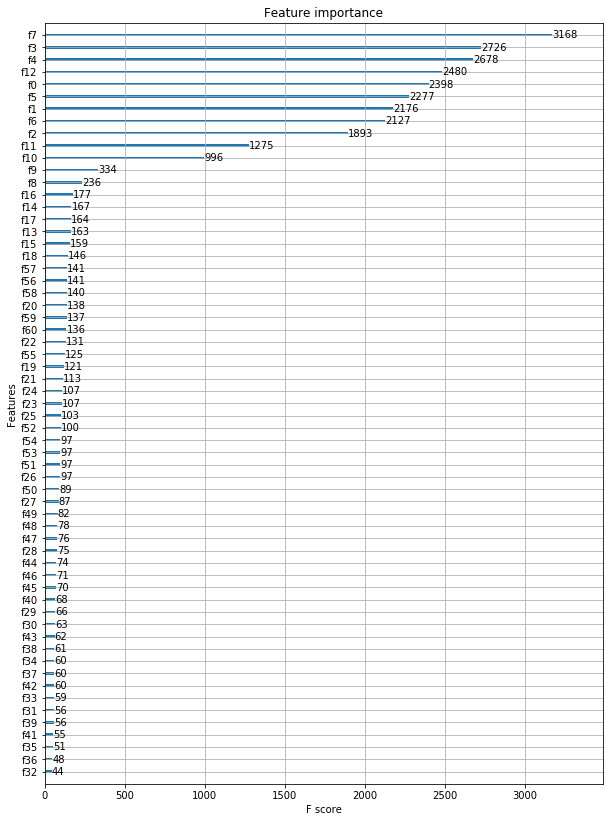

In [46]:
#feature map
import matplotlib.pyplot as plt
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

plot_features(model, (10,14))

In [ ]:
# to-do-list: train and test other models with X and Y data


In [ ]:
# to-do-list: comparing different models



In [ ]:
# to-do-list: comparing features



In [ ]:
# to-do-list: model selection for different features



In [ ]:
# to-do-list: model ensemble

